In [206]:
import pandas as pd
import matplotlib.pyplot as plt

---
### 초등학교 데이터 시간 지역행으로 정리

In [60]:
elementaryschool = pd.read_csv("./data/elementaryschool.csv")
elementaryschool.head()

,행정구역별,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,경기도,889034,924142,956758,983887,986056,979630,966347,951908,920586,...,739619,732307,733359,727380,733941,752499,769744,761731,763912,767346
1,서울특별시,759443,762967,759229,759010,736710,711136,689169,665227,633486,...,469392,457517,450675,436121,428333,424800,422293,409536,399435,393565
2,부산광역시,294929,293685,291342,288174,277769,265083,252856,242193,227494,...,160821,155754,154283,151207,150863,152775,155589,153527,153921,154858
3,경상남도,269119,273581,278337,283632,280491,275274,270349,264776,254368,...,190166,186973,187075,185325,186619,191016,194606,190849,189176,187423
4,인천광역시,245716,250264,250477,247046,238650,230067,222154,214671,205781,...,157918,156740,157099,155590,156470,158871,160853,156928,155271,155906


In [61]:
elementaryschool
range(len(elementaryschool.columns[1:]))

range(0, 23)

In [62]:
elementaryschool.columns[1:]

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [63]:
elementaryschool.columns[1:][0]

'2000'

In [64]:
len(elementaryschool.columns)-1

23

In [65]:
len(elementaryschool.index)

17

---
### 초등학생 인원수 컬럼을 시점/지역명/인원변화로 정리

In [148]:
range(len(elementaryschool.index))
elementaryschool.iloc[:,1]

0     889034
1     759443
2     294929
3     269119
4     245716
5     217710
6     216465
7     163677
8     159683
9     151526
10    126820
11    125748
12    124176
13    122613
14    106554
15     46778
16         0
Name: 2000, dtype: int64

In [67]:
test = []
sid = []
sido = []
num = 0
tom = 0
for t in range(len(elementaryschool.columns[1:])): # 24번 
    for i in range(len(elementaryschool.index)): # 17번
        test.append(elementaryschool.columns[1:][num])
    num+=1

for t in range(len(elementaryschool.index)): # 17번
    sid.append(elementaryschool.iloc[:,0][t])
sido.append(sid *23) # 전국 시군구를 2000~2022에 맞춰 23번 곱해 리스트를 만듦.
years = []
f = 1
for i in range(len(elementaryschool.columns)-1):
        for k in range(17):
            years.append(elementaryschool.iloc[:,f][k])
        f+=1


In [68]:
# row수 확인.
print(len(test))
print(len(sido[0]))
print(len(years))

391
391
391


In [69]:
elementarySchool = pd.DataFrame(
    {'시점':test,
    '지역':sido[0],
    '초등학생인원수변화':years
    }
)
elementarySchool

,시점,지역,초등학생인원수변화
0,2000,경기도,889034
1,2000,서울특별시,759443
2,2000,부산광역시,294929
3,2000,경상남도,269119
4,2000,인천광역시,245716
...,...,...,...
386,2022,충청북도,83827
387,2022,강원도,71530
388,2022,울산광역시,66450
389,2022,제주특별자치도,41628


In [70]:
elementarySchool.shape
print(elementarySchool.iloc[:,1].unique())
print(elementarySchool.iloc[:,0].unique())

['경기도' '서울특별시' '부산광역시' '경상남도' '인천광역시' '경상북도' '대구광역시' '전라남도' '전라북도' '충청남도'
 '광주광역시' '대전광역시' '충청북도' '강원도' '울산광역시' '제주특별자치도' '세종특별자치시']
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']


In [71]:
elementarySchool.to_csv("./edudata/시군구별.초등학생_학생수_변화.csv")

---
### 시.군.구 2000~2022년 중학생 인원수 변화

In [72]:
middel = pd.read_csv("./data/midschool.csv")
middel = middel.iloc[1:,:] # 1999년 데이터 제거하여 유치원, 초등학교 데이터와 년도 맞추기

In [73]:
state = []
state.append('년도')
for i in range(17):
    state.append(sido[0][i])
state

['년도',
 '경기도',
 '서울특별시',
 '부산광역시',
 '경상남도',
 '인천광역시',
 '경상북도',
 '대구광역시',
 '전라남도',
 '전라북도',
 '충청남도',
 '광주광역시',
 '대전광역시',
 '충청북도',
 '강원도',
 '울산광역시',
 '제주특별자치도',
 '세종특별자치시']

In [178]:
middel.columns = state
# 경기 서울 경남 인천 부산/ 경북 대구 /충남/ 전북? 전남 /광주 충북 대전 강원 제주 세종
middel.rename(columns={"부산광역시":"경상남도","경상남도":"인천광역시","인천광역시":"부산광역시","전라남도":"충청남도","충청남도":"전라남도","대전광역시":"충청북도","충청북도":"대전광역시"},inplace=True)
			# df_seoul.rename(columns={"전입지별":"전입지"},inplace=True)
middel.rename(columns={"Unnamed: 0":"년도"})

,년도,경기도,서울특별시,경상남도,인천광역시,부산광역시,경상북도,대구광역시,충청남도,전라북도,전라남도,광주광역시,충청북도,대전광역시,강원도,울산광역시,제주특별자치도,세종특별자치시
0,2000,359220,375605,122943,105546,150783,102583,105198,73993,78855,79535,58783,60603,60020,61002,45333,20537,0
1,2001,367867,364688,120808,106012,144935,99548,103813,71934,75524,74918,58350,58828,59423,59026,45515,19963,0
2,2002,384591,361244,120998,107810,143244,98199,105561,70521,74163,72478,59823,57591,59748,57806,47075,20178,0
3,2003,402500,359457,121832,109493,141010,96960,106094,69328,72900,70707,61201,57150,60236,56816,48238,20719,0
4,2004,433314,370551,127439,114670,144092,98613,110385,71099,74161,71739,64660,58853,63037,57523,51200,22207,0
5,2005,463457,379188,132949,119834,146491,100807,112661,74102,75975,74105,67938,61447,65474,58972,53448,23856,0
6,2006,487357,384977,138384,123135,148618,102754,115325,77201,78238,76075,70639,63839,67542,60318,55657,25252,0
7,2007,489548,375937,138629,121864,144991,101636,113962,78026,78859,76055,71033,64291,67626,59834,55201,25667,0
8,2008,488203,365579,138290,118916,139913,100182,112708,78437,78526,75460,71092,64261,67431,59168,54737,25708,0
9,2009,484656,355838,137403,115198,134976,98685,110449,78369,77765,75119,70471,63516,66925,58605,53625,25372,0


In [150]:
middel = middel.rename(columns={"Unnamed: 0":"년도"})

In [180]:
# del middel['level_0']
middel

,년도,경기도,서울특별시,경상남도,인천광역시,부산광역시,경상북도,대구광역시,충청남도,전라북도,전라남도,광주광역시,충청북도,대전광역시,강원도,울산광역시,제주특별자치도,세종특별자치시
0,2000,359220,375605,122943,105546,150783,102583,105198,73993,78855,79535,58783,60603,60020,61002,45333,20537,0
1,2001,367867,364688,120808,106012,144935,99548,103813,71934,75524,74918,58350,58828,59423,59026,45515,19963,0
2,2002,384591,361244,120998,107810,143244,98199,105561,70521,74163,72478,59823,57591,59748,57806,47075,20178,0
3,2003,402500,359457,121832,109493,141010,96960,106094,69328,72900,70707,61201,57150,60236,56816,48238,20719,0
4,2004,433314,370551,127439,114670,144092,98613,110385,71099,74161,71739,64660,58853,63037,57523,51200,22207,0
5,2005,463457,379188,132949,119834,146491,100807,112661,74102,75975,74105,67938,61447,65474,58972,53448,23856,0
6,2006,487357,384977,138384,123135,148618,102754,115325,77201,78238,76075,70639,63839,67542,60318,55657,25252,0
7,2007,489548,375937,138629,121864,144991,101636,113962,78026,78859,76055,71033,64291,67626,59834,55201,25667,0
8,2008,488203,365579,138290,118916,139913,100182,112708,78437,78526,75460,71092,64261,67431,59168,54737,25708,0
9,2009,484656,355838,137403,115198,134976,98685,110449,78369,77765,75119,70471,63516,66925,58605,53625,25372,0


In [181]:
middel_N = middel.set_index('년도')
middel_N


,경기도,서울특별시,경상남도,인천광역시,부산광역시,경상북도,대구광역시,충청남도,전라북도,전라남도,광주광역시,충청북도,대전광역시,강원도,울산광역시,제주특별자치도,세종특별자치시
년도,,,,,,,,,,,,,,,,,
2000,359220,375605,122943,105546,150783,102583,105198,73993,78855,79535,58783,60603,60020,61002,45333,20537,0
2001,367867,364688,120808,106012,144935,99548,103813,71934,75524,74918,58350,58828,59423,59026,45515,19963,0
2002,384591,361244,120998,107810,143244,98199,105561,70521,74163,72478,59823,57591,59748,57806,47075,20178,0
2003,402500,359457,121832,109493,141010,96960,106094,69328,72900,70707,61201,57150,60236,56816,48238,20719,0
2004,433314,370551,127439,114670,144092,98613,110385,71099,74161,71739,64660,58853,63037,57523,51200,22207,0
2005,463457,379188,132949,119834,146491,100807,112661,74102,75975,74105,67938,61447,65474,58972,53448,23856,0
2006,487357,384977,138384,123135,148618,102754,115325,77201,78238,76075,70639,63839,67542,60318,55657,25252,0
2007,489548,375937,138629,121864,144991,101636,113962,78026,78859,76055,71033,64291,67626,59834,55201,25667,0
2008,488203,365579,138290,118916,139913,100182,112708,78437,78526,75460,71092,64261,67431,59168,54737,25708,0


In [196]:
middel_N.iloc[22,:][16] # 22. 16
middel_N.columns[0] # 0~16
middel_N.index[0] # 0 ~22

2022

In [203]:
test = []
sid = []
sido = []
num = 0
tom = 0
for t in range(23): # 22 
    for i in range(17): # 17번
        # print(middel.iloc[:,1][num])
        test.append(middel_N.index[t])
    num+=1

for t in range(17): # 24번
    sid.append(middel_N.columns[t])
sido.append(sid *23) # 전국 시군구를 2000~2022에 맞춰 23번 곱해 리스트를 만듦.
years = []
# f = 2
for i in range(23):
        for k in range(17):
            # print(middel.iloc[:,f][k])
            years.append(middel_N.iloc[i,:][k])# 22. 16
        # f+=1

In [204]:
# row수 확인.
print(len(test))
print(len(sido[0]))
print(len(years))

391
391
391


In [251]:
middelSchool = pd.DataFrame(
    {'시점':test,
    '지역':sido[0],
    '중학생인원수변화':years
    }
)
middelSchool.to_csv("./edudata/시군구별.중학생_학생수_변화.csv")
middelSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        391 non-null    int64 
 1   지역        391 non-null    object
 2   중학생인원수변화  391 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.3+ KB


In [246]:
middelSchool[middelSchool['시점']==2000]
# middelSchool['초등학생인원수변화'][0:17]

,시점,지역,중학생인원수변화
0,2000,경기도,359220
1,2000,서울특별시,375605
2,2000,경상남도,122943
3,2000,인천광역시,105546
4,2000,부산광역시,150783
5,2000,경상북도,102583
6,2000,대구광역시,105198
7,2000,충청남도,73993
8,2000,전라북도,78855
9,2000,전라남도,79535


In [249]:
middelSchool.iloc[:,0].unique()
middelSchool.iloc[:,1].unique()

array(['경기도', '서울특별시', '경상남도', '인천광역시', '부산광역시', '경상북도', '대구광역시', '충청남도',
       '전라북도', '전라남도', '광주광역시', '충청북도', '대전광역시', '강원도', '울산광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

---
### 시.군.구 2000~2022년 고등학생 인원수 변화 

In [79]:
hightSchool = pd.read_csv("./data/highschool.csv")
del hightSchool['1999'] # 2000년대 이전 지우기.
hightSchool

,행정구역별,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울,453068,410341,378168,366556,356157,353023,349154,355193,361942,...,334123,320398,308306,299556,282968,259554,236689,224316,216319,207388
1,경기,341998,334121,329606,340105,352116,369764,385461,411732,436635,...,460580,452698,444554,440319,422839,393008,364168,350199,345024,340895
2,부산,177255,159488,146617,140932,137315,136641,134807,137276,139134,...,122060,115580,109773,105793,99662,90667,82132,76573,73499,70161
3,경남,136580,125590,117448,114502,112438,113156,114155,119431,124398,...,127457,123853,120084,117575,111618,102461,93849,89026,86627,84613
4,경북,120557,108766,100360,97636,95119,94250,93657,95208,96807,...,95018,92328,90238,88456,84926,77945,71272,66899,64967,62986
5,대구,118167,107827,101125,100375,99865,101793,102098,105396,107627,...,103666,98916,95199,91904,86664,78245,70945,65807,63074,59373
6,인천,108187,103690,99275,99033,98410,99762,101888,106501,111480,...,105310,101513,98764,96539,92195,84916,78401,74886,73573,71760
7,전남,97935,86517,77697,72897,68908,67310,66384,67989,70264,...,71790,70238,68407,66973,63631,58249,52755,49112,46781,44913
8,전북,91601,82314,75869,72920,70726,70130,69640,70584,72218,...,74621,73433,71544,70449,67149,62354,56769,52932,50532,48265
9,충남,84959,77687,72464,70439,68677,68059,67466,69373,72153,...,75837,74903,73563,73039,70405,65509,60433,57791,56671,56081


In [80]:
hightSchool.sort_values(by='2020',ascending=False,inplace=True)

In [81]:
hightSchool1 = hightSchool.T
# hightSchool1.columns = state

In [82]:
state[1:]

['경기도',
 '서울특별시',
 '부산광역시',
 '경상남도',
 '인천광역시',
 '경상북도',
 '대구광역시',
 '전라남도',
 '전라북도',
 '충청남도',
 '광주광역시',
 '대전광역시',
 '충청북도',
 '강원도',
 '울산광역시',
 '제주특별자치도',
 '세종특별자치시']

In [83]:
hightSchool.iloc[:,0].unique()

array(['경기', '서울', '경남', '부산', '인천', '경북', '대구', '충남', '전북', '전남', '광주',
       '대전', '충북', '강원', '울산', '제주', '세종'], dtype=object)

In [84]:
hightSchool1.columns = state[1:]
hightSchool1.rename(columns={"부산광역시":"인천광역시","인천광역시":"부산광역시","대전광역시":"충청북도","충청북도":"대전광역시"},inplace=True)

hightSchool1.head()

,경기도,서울특별시,인천광역시,경상남도,부산광역시,경상북도,대구광역시,전라남도,전라북도,충청남도,광주광역시,충청북도,대전광역시,강원도,울산광역시,제주특별자치도,세종특별자치시
행정구역별,경기,서울,경남,부산,인천,경북,대구,충남,전북,전남,광주,대전,충북,강원,울산,제주,세종
2000,341998,453068,136580,177255,108187,120557,118167,84959,91601,97935,68727,66432,65887,69185,47065,23865,0
2001,334121,410341,125590,159488,103690,108766,107827,77687,82314,86517,62735,61636,61119,63029,44808,21505,0
2002,329606,378168,117448,146617,99275,100360,101125,72464,75869,77697,58443,58804,58025,58679,42700,20229,0
2003,340105,366556,114502,140932,99033,97636,100375,70439,72920,72897,57508,57989,56694,56692,42836,19415,0


In [93]:
hightSchool1 = hightSchool1.iloc[1:,:]

In [94]:
hightSchool1.head()

,경기도,서울특별시,인천광역시,경상남도,부산광역시,경상북도,대구광역시,전라남도,전라북도,충청남도,광주광역시,충청북도,대전광역시,강원도,울산광역시,제주특별자치도,세종특별자치시
2000,341998,453068,136580,177255,108187,120557,118167,84959,91601,97935,68727,66432,65887,69185,47065,23865,0
2001,334121,410341,125590,159488,103690,108766,107827,77687,82314,86517,62735,61636,61119,63029,44808,21505,0
2002,329606,378168,117448,146617,99275,100360,101125,72464,75869,77697,58443,58804,58025,58679,42700,20229,0
2003,340105,366556,114502,140932,99033,97636,100375,70439,72920,72897,57508,57989,56694,56692,42836,19415,0
2004,352116,356157,112438,137315,98410,95119,99865,68677,70726,68908,56967,57617,55247,55002,43116,18880,0


In [86]:
range(len(hightSchool1.columns[:])-1)

range(0, 16)

In [87]:
hightSchool1.iloc[:,16][22]

10818

In [88]:
range(len(hightSchool1.index)-1)

range(0, 23)

In [95]:
hightSchool1.shape

(23, 17)

In [122]:
hightSchool1.iloc[:,0][0]
hightSchool1.iloc[22,:][16]

11484

In [123]:
range(17)

range(0, 17)

In [124]:
test = []
sid = []
sido = []
num = 0
tom = 0
for t in range(23): # 24번 
    for i in range(17): # 17
        test.append(hightSchool1.index[:][num])
    num+=1

for t in range(len(hightSchool1.columns[:])): # 17
    sid.append(hightSchool1.columns[:][t])
sido.append(sid *23) # 전국 시군구를 2000~2022에 맞춰 23번 곱해 리스트를 만듦.
years = []
f = 0
for i in  range(23):
        for k in range(17):
            years.append(hightSchool1.iloc[f,:][k])
        f+=1

In [125]:
# row수 확인.
print(len(test))
print(len(sido[0]))
print(len(years))

391
391
391


In [126]:
hightSchool_Result = pd.DataFrame(
    {'시점':test,
    '지역':sido[0],
    '고등학생인원수변화':years
    }
)
hightSchool_Result.head()

,시점,지역,고등학생인원수변화
0,2000,경기도,341998
1,2000,서울특별시,453068
2,2000,인천광역시,136580
3,2000,경상남도,177255
4,2000,부산광역시,108187


In [ ]:
hightSchool_Result.shape

(391, 3)

In [132]:
hightSchool_Result.iloc[:,0].unique()
hightSchool_Result['시점'] = hightSchool_Result['시점'].astype('int64')

In [133]:
# hightSchool_Result = pd.read_csv("./edudata/시군구별.고등학생_학생수_변화.csv", index_col=0)
test = hightSchool_Result[hightSchool_Result['시점']==2020]
test

,시점,지역,고등학생인원수변화
340,2020,경기도,350199
341,2020,서울특별시,224316
342,2020,인천광역시,89026
343,2020,경상남도,76573
344,2020,부산광역시,74886
345,2020,경상북도,66899
346,2020,대구광역시,65807
347,2020,전라남도,57791
348,2020,전라북도,52932
349,2020,충청남도,49112


In [ ]:
# 포폴에도 Seaborn 쓴거 있어야 해요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

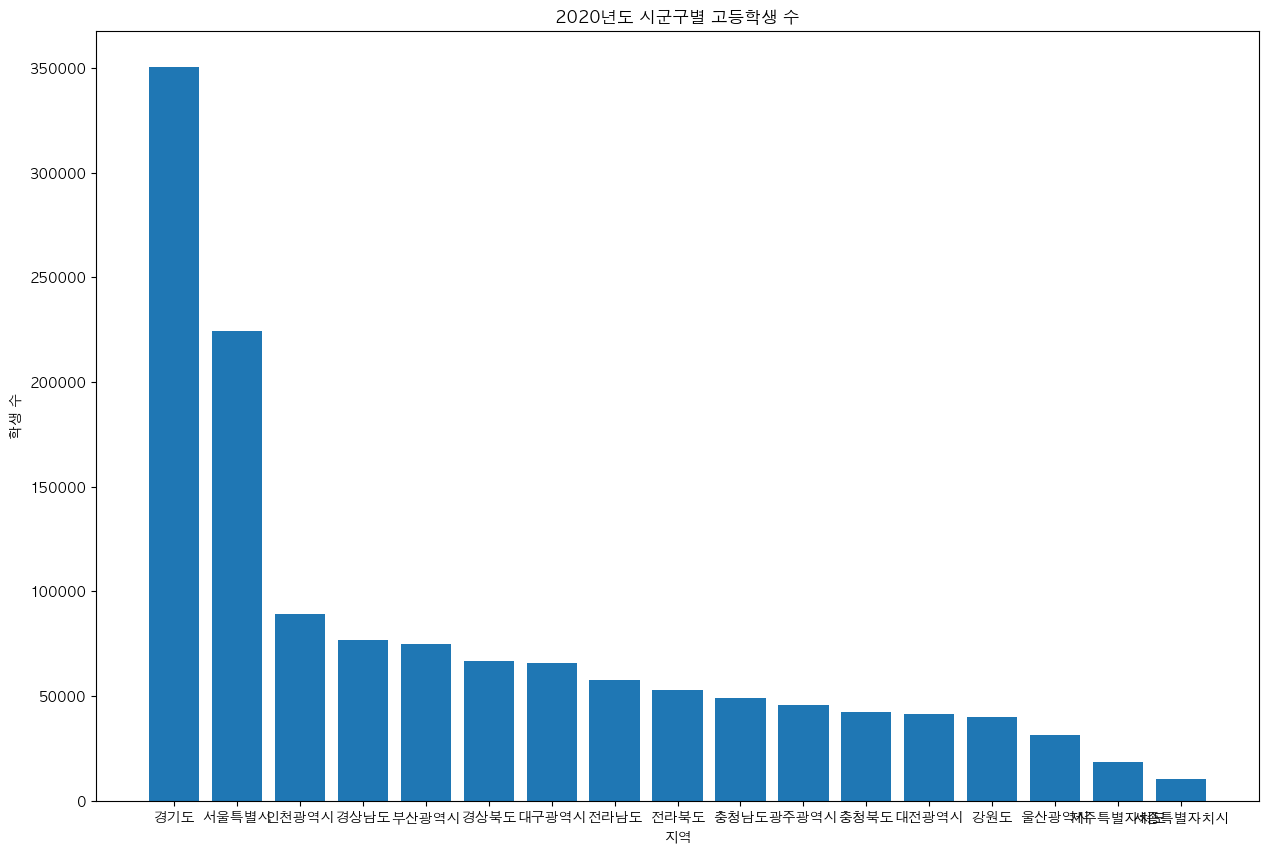

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# plt.legend('best')
plt.title('2020년도 시군구별 고등학생 수')
plt.ylabel('학생 수')
plt.xlabel('지역')
plt.bar(test['지역'],test['고등학생인원수변화'])

plt.show()

In [136]:
hightSchool_Result.iloc[:,1].unique()
hightSchool_Result.to_csv('./edudata/시군구별.고등학생_학생수_변화.csv')